In [ ]:
import pickle as pkl

In [ ]:
path="/sdd/berzelius/final_results/delta_0.0/results.pkl"

In [ ]:
X = pkl.load(open(f"{path}", "rb"))

In [ ]:
PREDS = [x["prediction"] for x in X[1]]

In [ ]:
np.vstack(PREDS).shape

In [ ]:
len(x[1])

In [ ]:
x[1][0]

In [ ]:
%config Completer.use_jedi = False



In [3]:
import pickle
import pandas as pd


import seaborn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True


# Find $\delta$

In [ ]:
#X = pickle.load(open("/sdd/berzelius/delta_runs/all_results.pkl", "rb"))
X = pickle.load(open("/home/ekvall/prosittransformer/notebooks/data/all_results.pkl", "rb"))


In [ ]:
data = list()
for x in X:
    metric = "fdr"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})
    metric = "fnr"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})
    metric = "mean_spectral_angle"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.loc[df.metric == "fdr", 'metric'] = "FDR"
df.loc[df.metric == "fnr", 'metric'] = "FNR"
df.loc[df.metric == "mean_spectral_angle", 'metric'] = "Angular Similarity"


In [ ]:
df_test = df.iloc[[i for i in range(len(df)) if i % 3 == 0 ]]

In [ ]:
deltas = sorted(list(set(df_test.delta)))

In [ ]:
new_deltas = [d for i, d in enumerate(deltas) if i % 2 == 0]

In [ ]:
df_test = df[df.delta.isin(new_deltas)]

In [ ]:
fs = 18

In [ ]:
plt.figure(figsize=(10, 6))
ax = seaborn.lineplot(x="delta", y="value", marker="o", hue="metric", data = df_test)
legend = ax.legend(handles=ax.legend_.legendHandles, labels=['FDR', 'FNR', 'Angular Similarity'], prop={"size":fs})


#plt.legend.get_title().set_fontsize('6')
#plt.rcParams['legend.title_fontsize'] = fs
plt.xlabel(r"$\delta$", fontsize=fs + 10)
plt.ylabel("FDR/FNR/Angular Similarity", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=6)

#plt.savefig("./compare.png")
plt.savefig('./plots/compare_delta.png')

In [ ]:
import numpy as np

# Final model result plots

In [ ]:
!pip install feather

In [63]:
import feather
import seaborn as sns

In [64]:
plt.style.use('ggplot')

In [65]:
!ls /sdd/berzelius/final_results/delta_0.15/dataframe.feather

/sdd/berzelius/final_results/delta_0.15/dataframe.feather


In [66]:
!ls /sdd/berzelius/final_results/delta_0.34

args.json	config.json  model.pb		tfModel      torchResult.hdf5
checkpoint.bin	log	     pytorch_model.bin	tfModel.zip


In [67]:

path = '/sdd/berzelius/final_results/delta_0.15/dataframe.feather'
datafile = feather.read_dataframe(path)

In [68]:
datafile = datafile.rename(columns={"jacc_alpha" : "FDR", 
                                    "jacc_beta" : "FNR", 
                                    "spectral_angle" : "Angular Similarity",
                                   "data_set" : "Data Set"})

In [69]:
datafile["Data Set"] = datafile["Data Set"].map({'ho':"Prosit RNN", 'test':"Prosit Transformer"})

In [70]:
Prosit_RNN = datafile[datafile["Data Set"] == "Prosit RNN"]
Prosit_Transformer = datafile[datafile["Data Set"] == "Prosit Transformer"]

In [71]:
Prosit_RNN = Prosit_RNN.sort_values(by=['pool', 'raw_file', 'scan_number'])
Prosit_Transformer = Prosit_Transformer.sort_values(by=['pool', 'raw_file', 'scan_number'])

In [72]:
Prosit_RNN = Prosit_RNN.reset_index()
Prosit_Transformer = Prosit_Transformer.reset_index()

In [73]:
all(Prosit_RNN[['pool', 'raw_file', 'scan_number']] == Prosit_Transformer[['pool', 'raw_file', 'scan_number']])

True

In [74]:
len(Prosit_RNN)

1419705

In [75]:
round(sum(Prosit_Transformer["Angular Similarity"] > Prosit_RNN["Angular Similarity"]) / len(Prosit_RNN),3)

0.753

In [76]:
round(sum( Prosit_RNN["Angular Similarity"] > Prosit_Transformer["Angular Similarity"]) / len(Prosit_RNN),3)

0.247

In [77]:
sum( Prosit_RNN["Angular Similarity"] == Prosit_Transformer["Angular Similarity"]) / len(Prosit_RNN)

0.0

In [78]:
all(Prosit_RNN[['pool', 'raw_file', 'scan_number']] == Prosit_Transformer[['pool', 'raw_file', 'scan_number']])

True

In [79]:
x = Prosit_Transformer.sequence.str.split(",").str.len()

In [80]:
min(x)

7

In [81]:
max(x)

30

In [82]:
Prosit_RNN

,index,raw_file,scan_number,ce,ce_calib,sequence,precursor_charge,method,collision_energy_aligned_normed,score,...,PCM,nterm,cterm,FDR,FNR,Data Set,ce_calib_binned,All,counts,pool
0,187164,02445a_BA1-TUM_HLA_1_01_01-DDA-1h-R1,854,0.28,0.313801,"10,1,14,9,10,6,10,8",2,HCD,0.313801,110.629997,...,"10,1,14,9,10,6,10,8|2|HCD|0.28",10,8,0.214286,0.000000,Prosit RNN,0.31,,1.0,TUM_HLA
1,986427,02445a_BA1-TUM_HLA_1_01_01-DDA-1h-R1,854,0.28,0.313801,"10,1,14,9,10,6,10,8",1,HCD,0.313801,128.820007,...,"10,1,14,9,10,6,10,8|1|HCD|0.28",10,8,0.100000,0.000000,Prosit RNN,0.31,,1.0,TUM_HLA
2,1128811,02445a_BA1-TUM_HLA_1_01_01-DDA-1h-R1,854,0.28,0.313801,"10,1,14,9,10,6,10,8",2,HCD,0.313801,101.639999,...,"10,1,14,9,10,6,10,8|2|HCD|0.28",10,8,0.142857,0.142857,Prosit RNN,0.31,,1.0,TUM_HLA
3,1391485,02445a_BA1-TUM_HLA_1_01_01-DDA-1h-R1,854,0.28,0.313801,"10,1,14,9,10,6,10,8",2,HCD,0.313801,104.209999,...,"10,1,14,9,10,6,10,8|2|HCD|0.28",10,8,0.071429,0.133333,Prosit RNN,0.31,,1.0,TUM_HLA
4,590604,02445a_BA1-TUM_HLA_1_01_01-DDA-1h-R1,857,0.28,0.313801,"5,13,6,10,1,8,9,8",2,HCD,0.313801,70.669998,...,"5,13,6,10,1,8,9,8|2|HCD|0.28",5,8,0.200000,0.000000,Prosit RNN,0.31,,1.0,TUM_HLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419700,1299226,01640c_GG3-Thermo_SRM_Pool_22_01_01-3xHCD-1h-R5,2172,0.3,0.310725,"18,7,13,10,18,5,1,13,6,18,13,18,17,1,14,18,18,...",2,HCD,0.310725,50.358002,...,"18,7,13,10,18,5,1,13,6,18,13,18,17,1,14,18,18,...",18,15,0.466667,0.111111,Prosit RNN,0.31,,1.0,Thermo_SRM_Pool
1419701,1414699,01640c_GG3-Thermo_SRM_Pool_22_01_01-3xHCD-1h-R5,2172,0.25,0.260725,"18,7,13,10,18,5,1,13,6,18,13,18,17,1,14,18,18,...",3,HCD,0.260725,58.848000,...,"18,7,13,10,18,5,1,13,6,18,13,18,17,1,14,18,18,...",18,15,0.432432,0.000000,Prosit RNN,0.26,,1.0,Thermo_SRM_Pool
1419702,270797,01640c_GG3-Thermo_SRM_Pool_22_01_01-3xHCD-1h-R5,2391,0.25,0.260725,"7,4,20,1,10,13,10,1,13,13,4,13,4,20,1,17,13,8,...",2,HCD,0.260725,155.860001,...,"7,4,20,1,10,13,10,1,13,13,4,13,4,20,1,17,13,8,...",7,15,0.103448,0.187500,Prosit RNN,0.26,,1.0,Thermo_SRM_Pool
1419703,318070,01640c_GG3-Thermo_SRM_Pool_22_01_01-3xHCD-1h-R5,2391,0.3,0.310725,"7,4,20,1,10,13,10,1,13,13,4,13,4,20,1,17,13,8,...",2,HCD,0.310725,146.970001,...,"7,4,20,1,10,13,10,1,13,13,4,13,4,20,1,17,13,8,...",7,15,0.103448,0.071429,Prosit RNN,0.31,,1.0,Thermo_SRM_Pool


In [83]:
Prosit_RNN.scan_number.shape

(1419705,)

In [84]:
len(set(Prosit_RNN.scan_number))

2754

In [85]:
datafile["Data Set"]

0                  Prosit RNN
1                  Prosit RNN
2                  Prosit RNN
3                  Prosit RNN
4                  Prosit RNN
                  ...        
2839405    Prosit Transformer
2839406    Prosit Transformer
2839407    Prosit Transformer
2839408    Prosit Transformer
2839409    Prosit Transformer
Name: Data Set, Length: 2839410, dtype: category
Categories (2, object): ['Prosit Transformer', 'Prosit RNN']

In [47]:
#datafile["Data Set"] = datafile["Data Set"].map({'ho':"Prosit RNN", 'test':"Prosit Transformer"})
#.loc[datafile["Data Set"] == "ho", "Data Set"] = "Prosit Transformer"

In [86]:
fs = 18

In [87]:
def filterDf(df, feature = "Angular Similarity", lower= 0.5, upper=1):
    mask = ((df[feature]>lower) & (df[feature] < upper))
    return df[mask]

In [88]:
sns.set_style("whitegrid", {'axes.grid' : False})


In [89]:
#palette ={'Prosit Transformer': "C1", 'Prosit RNN': "C6"}
palette ={'Prosit Transformer': "C1", 'Prosit RNN': "C0"}


In [90]:
datafile

,raw_file,scan_number,ce,ce_calib,sequence,precursor_charge,method,collision_energy_aligned_normed,score,Angular Similarity,...,PCM,nterm,cterm,FDR,FNR,Data Set,ce_calib_binned,All,counts,pool
0,02445d_BH2-TUM_HLA_86_01_01-3xHCD-1h-R4,1428,0.3,0.317071,"8,12,8,3,7,9,5,7,15,7,10",3,HCD,0.317071,127.760002,0.889237,...,"8,12,8,3,7,9,5,7,15,7,10|3|HCD|0.3",8,10,0.280000,0.052632,Prosit RNN,0.32,,1.0,TUM_HLA
1,01640c_BD8-Thermo_SRM_Pool_60_01_01-DDA-1h-R2,1033,0.28,0.320979,"20,3,10,18,12,10,1,18,9",2,HCD,0.320979,122.330002,0.941458,...,"20,3,10,18,12,10,1,18,9|2|HCD|0.28",20,9,0.125000,0.000000,Prosit RNN,0.32,,1.0,Thermo_SRM_Pool
2,02445d_BG6-TUM_HLA_78_01_01-3xHCD-1h-R4,1033,0.25,0.277811,"13,16,15,6,16,16,5,8,1,10",2,HCD,0.277811,82.261002,0.902218,...,"13,16,15,6,16,16,5,8,1,10|2|HCD|0.25",13,10,0.000000,0.133333,Prosit RNN,0.28,,1.0,TUM_HLA
3,03036a_BD12-TUM_HLA2_144_01_01-DDA-1h-R1,1792,0.28,0.304667,"12,16,12,15,20,4,15,10,9,1,17,14,18,16,9",4,HCD,0.304667,63.062000,0.448464,...,"12,16,12,15,20,4,15,10,9,1,17,14,18,16,9|4|HCD...",12,9,0.416667,0.000000,Prosit RNN,0.3,,1.0,TUM_HLA2
4,01650b_BA3-TUM_first_pool_59_01_01-DDA-1h-R2,1364,0.28,0.324262,"5,12,4,1,3,16,4,18,1,14,1,6,9",2,HCD,0.324262,81.803001,0.754972,...,"5,12,4,1,3,16,4,18,1,14,1,6,9|2|HCD|0.28",5,9,0.285714,0.062500,Prosit RNN,0.32,,1.0,TUM_first_pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839405,02097a_BE11-TUM_isoform_59_01_01-2xIT_2xHCD-1h-R3,1567,0.2,0.212523,"11,3,9,3,6,20,5,19,5,21,6,15",3,HCD,0.212523,71.878998,0.941249,...,"11,3,9,3,6,20,5,19,5,21,6,15|3|HCD|0.2",11,15,0.040000,0.040000,Prosit Transformer,0.21,,1.0,TUM_isoform
2839406,01625b_GA4-TUM_first_pool_25_01_01-2xIT_2xHCD-...,1178,0.2,0.220831,"3,11,17,5,17,7,4,6,12,9",2,HCD,0.220831,138.759995,0.940408,...,"3,11,17,5,17,7,4,6,12,9|2|HCD|0.2",3,9,0.050000,0.000000,Prosit Transformer,0.22,,1.0,TUM_first_pool
2839407,02445d_BB2-TUM_HLA_14_01_01-3xHCD-1h-R4,1038,0.3,0.329363,"10,4,16,9,8,10,17,7,18",3,HCD,0.329363,88.177002,0.976571,...,"10,4,16,9,8,10,17,7,18|3|HCD|0.3",10,18,0.000000,0.133333,Prosit Transformer,0.33,,1.0,TUM_HLA
2839408,03036a_BD3-TUM_HLA2_135_01_01-2xIT_2xHCD-1h-R1,1934,0.23,0.279485,"1,4,5,7,7,20,18,6,6,13,17,4,17,7,18,18,15",2,HCD,0.279485,210.910004,0.907014,...,"1,4,5,7,7,20,18,6,6,13,17,4,17,7,18,18,15|2|HC...",1,15,0.060606,0.138889,Prosit Transformer,0.28,,1.0,TUM_HLA2


In [91]:
filterDf(datafile)["Data Set"]

0                  Prosit RNN
1                  Prosit RNN
2                  Prosit RNN
4                  Prosit RNN
5                  Prosit RNN
                  ...        
2839405    Prosit Transformer
2839406    Prosit Transformer
2839407    Prosit Transformer
2839408    Prosit Transformer
2839409    Prosit Transformer
Name: Data Set, Length: 2823625, dtype: category
Categories (2, object): ['Prosit Transformer', 'Prosit RNN']

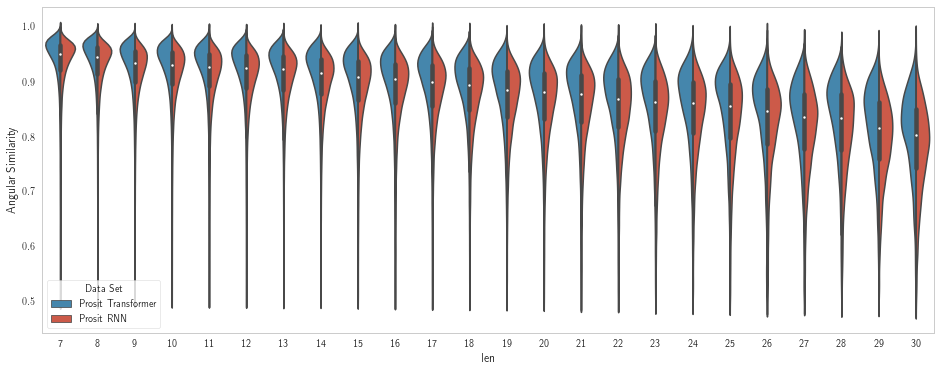

In [92]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="len", y="Angular Similarity", hue="Data Set",
                    data=filterDf(datafile), palette=palette, split=True, 
                    hue_order= ['Prosit Transformer', 'Prosit RNN'])

In [99]:
fs = 30

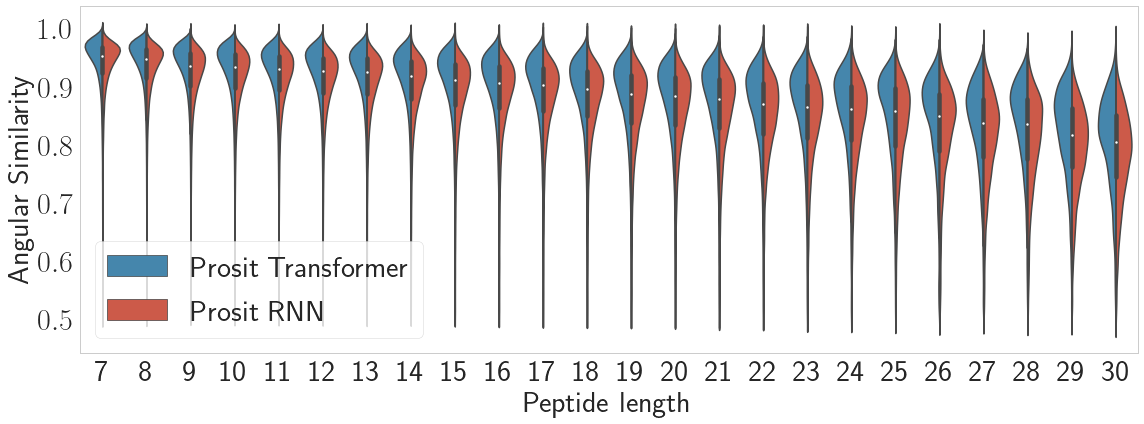

In [101]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="len", y="Angular Similarity", hue="Data Set",
                    data=filterDf(datafile), palette=palette, split=True, 
                    hue_order= ['Prosit Transformer', 'Prosit RNN'])



#plt.legend(title='', loc='lower left', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})
ax.legend(handles=ax.legend_.legendHandles, prop={"size":fs})

plt.xlabel("Peptide length", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel("Angular Similarity", fontsize=fs)
plt.tight_layout()
plt.savefig('./plots/violin_sa_pepLen.png')

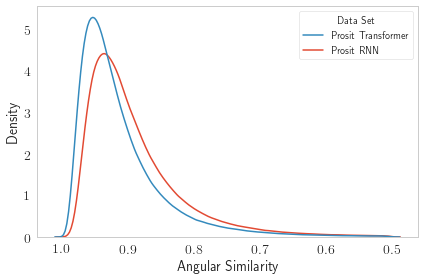

In [94]:
ax = sns.kdeplot(data=filterDf(datafile), x="Angular Similarity", 
                 hue="Data Set", 
                 hue_order= ['Prosit Transformer', 'Prosit RNN'],
                palette=palette)

ax.invert_xaxis()

#sns.kdeplot(data=filterDf(tape_df), x="spectral_angle", hue="data_set")
#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})
plt.xlabel("Angular Similarity", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
#plt.savefig('./plots/spectralAngleDist_x_reverse.png')

AttributeError: 'NoneType' object has no attribute 'set_title'

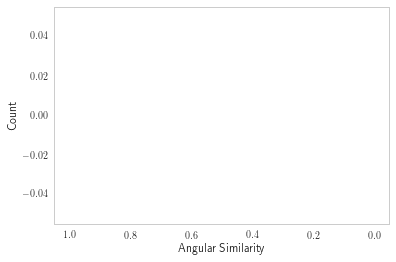

In [54]:
ax = sns.histplot(data=filterDf(datafile), x="Angular Similarity", 
                  hue="Data Set", kde =True, 
                  hue_order= ['Prosit Transformer', 'Prosit RNN'],
                 palette=palette)

ax.invert_xaxis()

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("Angular Similarity", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/spectralAngleDist.png')

In [ ]:
ax = sns.kdeplot(data=filterDf(datafile, "FNR", 0, 0.5), x="FNR", 
            hue="Data Set", hue_order= ['Prosit Transformer', 'Prosit RNN'],
            palette=palette)

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("FNR", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/FNR.png')

In [ ]:

ax = sns.kdeplot(data=filterDf(datafile, "FDR", 0, 0.5), x="FDR", hue="Data Set", palette=palette)

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("FDR", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/FDR.png')

In [ ]:
!pwd

In [ ]:
import pandas as pd

In [ ]:
!ls /sdd/berzelius/ceCalibration/

In [ ]:
def _makeFig(df: pd.DataFrame)->None:
    """Create figure"""
    fs=26 + 5
    plt.figure(figsize=(16, 10))
    ax = seaborn.lineplot(x="ce", y="sa", marker="o", hue="CE", data = df, palette=["C0", "C1", "C2","C3", "C4"])
    legend = ax.legend(handles=ax.legend_.legendHandles,
                       prop={"size":fs})
    plt.xlabel("Collision Energy", fontsize=fs)
    plt.ylabel("Median Angular Similarity", fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.plot([0.2, 0.2], [0, 1], color="C0")
    plt.plot([0.25, 0.25], [0, 1], color="C1")
    plt.plot([0.3, 0.3], [0, 1], color="C2")
    plt.plot([0.35, 0.35], [0, 1], color="C3")
    plt.plot([0.4, 0.4], [0, 1], color="C4")
    plt.tight_layout()
    plt.savefig('./plots/CeCalibration.png')

In [ ]:
#df = pd.read_csv("/sdd/berzelius/ceCalibration/CeCalibation.csv", index_col=0)

In [ ]:
_makeFig(df)

In [ ]:
ax = sns.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2,kde =True)

ax.invert_xaxis()

#sns.kdeplot(data=filterDf(tape_df), x="spectral_angle", hue="data_set")
plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})
plt.xlabel("Angular Similarity", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
#plt.savefig('./plots/spectralAngleDist_x_reverse.png')

In [ ]:
seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2,kde =True)

In [ ]:
seaborn.distplot()